Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [375]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [376]:
x_point = []
y_point = []

In [377]:
x_point = [2, 2, 0, -2, -2, 0, 4]
y_point= [1, 2, 6, 10, 0, 0, -20]
d = [1, 1, 1, -1, -1, -1, -1]

In [378]:
sd = [1, 1, 1, 0, 0, 0, 0]

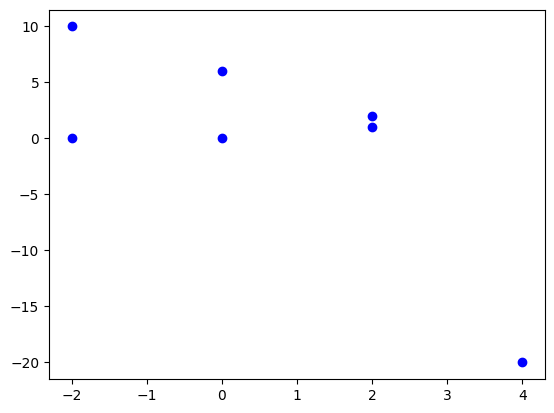

In [379]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [380]:
real_x = np.array(x_point)
real_y = np.array(y_point)

In [381]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Definiujemy model:

In [382]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [383]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (średni błąd kwadratowy - MSE). **Współczynnik uczenia = 0.1**

In [384]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [385]:
model.compile(loss='BinaryCrossentropy',optimizer=opt)

In [386]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proces **uczenia**:

In [387]:
data = np.column_stack((real_x,real_y))
data_train = np.asarray(data)

d_train = np.asarray(sd)


In [388]:
print(data_train)

[[  2   1]
 [  2   2]
 [  0   6]
 [ -2  10]
 [ -2   0]
 [  0   0]
 [  4 -20]]


In [389]:
epochs = 6000
h = model.fit(data_train,d_train, verbose=1, epochs=epochs, batch_size=5)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
2/2 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 3502/6000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 3503/6000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 3504/6000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 3505/6000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 3506/6000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 3507/6000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 3508/6000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 3509/6000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 3510/6000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 3511/6000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 3512/6000
2/2 [===========================

In [390]:
Loss = h.history['loss']
Loss

[2.119356632232666,
 1.8169918060302734,
 1.5143159627914429,
 1.208191156387329,
 0.5325906872749329,
 0.49689069390296936,
 1.3203904628753662,
 0.7532821297645569,
 0.5326380133628845,
 0.4878358840942383,
 0.4146912395954132,
 0.42189547419548035,
 1.268980860710144,
 1.1584416627883911,
 0.6444349884986877,
 0.46215349435806274,
 0.5997719168663025,
 1.1466968059539795,
 0.8557612299919128,
 0.5959145426750183,
 0.42250633239746094,
 0.3367595374584198,
 0.3986233174800873,
 0.2802363932132721,
 0.3029315769672394,
 0.4373619854450226,
 0.3153902590274811,
 0.3761708438396454,
 0.4008331894874573,
 0.33419492840766907,
 0.46532300114631653,
 0.3338742256164551,
 0.42502307891845703,
 0.4022919833660126,
 0.8883270025253296,
 0.6125761866569519,
 0.3818773925304413,
 0.39558145403862,
 0.8559831976890564,
 0.5808582901954651,
 0.35776329040527344,
 0.26733458042144775,
 0.3808440566062927,
 0.7861076593399048,
 0.530746579170227,
 0.3240639269351959,
 0.22900298237800598,
 0.225677

Sprawdźmy jakie są **wartości wag**:

In [391]:
weights = model.get_weights()

print(weights[0][0][0])
print(weights[1][0])    #bias

8.200812
-5.3895717


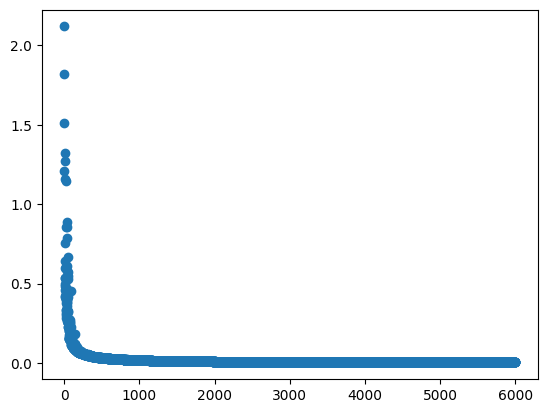

In [392]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

Sprawdzenie **modelu**:

In [393]:
#model.predict([0.6])

In [402]:
model.predict(data_train)

1/1 [==============================] - 0s 116ms/step


array([[9.9999696e-01],
       [9.9999946e-01],
       [9.9189115e-01],
       [8.1830053e-03],
       [3.4371894e-10],
       [4.5431927e-03],
       [1.3945935e-03]], dtype=float32)

In [402]:
X = np.linspace(min, max, num=10)
plt.plot(X,(weights[0][0][0])*X+(weights[1][0]),c='r')
plt.scatter(x_point,y_point,c='b')
plt.show()